In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.optim as optim
%matplotlib inline


In [2]:
features = pd.read_csv('temps.csv')

features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [3]:
print(features.shape)

(348, 9)


In [4]:
years = features['year']
months = features['month']
days = features['day']

import datetime

dates = [str(int(year)) + '-' + str(int(mouth)) + '-' + str(int(day)) for year, mouth, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [13]:
dates[:5]

[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

In [5]:
plt.style.use('fivethirtyeight')

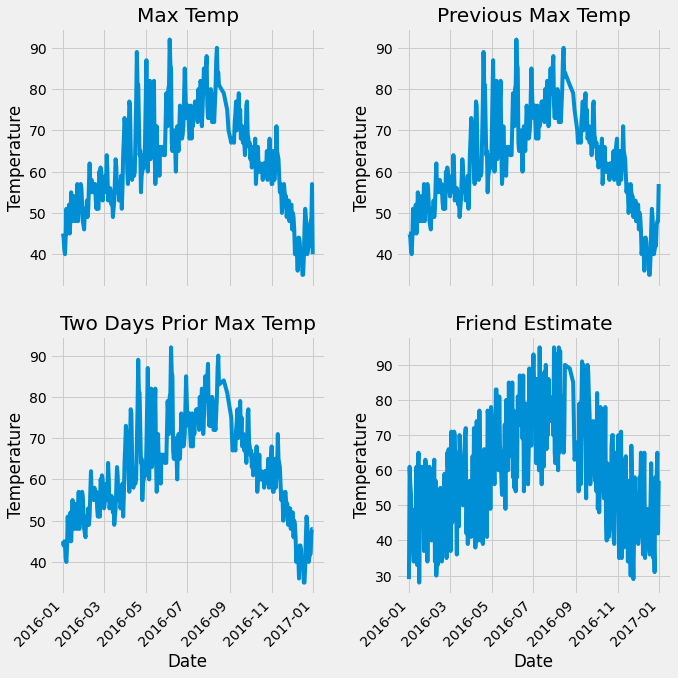

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature');ax1.set_title('Max Temp')

ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature'); ax2.set_title('Previous Max Temp')

ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature'); ax3.set_title('Two Days Prior Max Temp')

ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [12]:
features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [14]:
import numpy as np
labels = np.array(features['actual'])

features = features.drop('actual', axis = 1)

feature_list = list(features.columns)

features = np.array(features)

features.shape

(348, 14)

In [16]:
features[:5]

array([[2.016e+03, 1.000e+00, 1.000e+00, 4.500e+01, 4.500e+01, 4.560e+01,
        2.900e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 2.000e+00, 4.400e+01, 4.500e+01, 4.570e+01,
        6.100e+01, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 3.000e+00, 4.500e+01, 4.400e+01, 4.580e+01,
        5.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 4.000e+00, 4.400e+01, 4.100e+01, 4.590e+01,
        5.300e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [2.016e+03, 1.000e+00, 5.000e+00, 4.100e+01, 4.000e+01, 4.600e+01,
        4.100e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00]])

In [17]:
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)

In [18]:
input_features[0]

array([ 0.        , -1.5678393 , -1.65682171, -1.48452388, -1.49443549,
       -1.3470703 , -1.98891668,  2.44131112, -0.40482045, -0.40961596,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

In [19]:
features[0]

array([2.016e+03, 1.000e+00, 1.000e+00, 4.500e+01, 4.500e+01, 4.560e+01,
       2.900e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00])

In [20]:
input_features[1]

array([ 0.        , -1.5678393 , -1.54267126, -1.56929813, -1.49443549,
       -1.33755752,  0.06187741, -0.40961596, -0.40482045,  2.44131112,
       -0.40482045, -0.40482045, -0.41913682, -0.40482045])

In [23]:
x = torch.tensor(input_features, dtype = float)
y = torch.tensor(labels, dtype = float)

weights = torch.randn((14, 128), dtype = float, requires_grad = True)
biases = torch.randn(128, dtype=float, requires_grad = True)
weights2 = torch.randn((128,1), dtype = float, requires_grad = True)
biases2 = torch.rand(1, dtype=float, requires_grad = True)

lr = 1e-3
losses = []
for i in range(1000):
    hidden = x.mm(weights) + biases
    
    hidden = torch.relu(hidden)
    
    predictions = hidden.mm(weights2) + biases2
    
    loss = torch.mean((predictions - y) ** 2)
    losses.append(loss.data.numpy())
    
    if i% 100 == 0:
        print('loss', loss)
        
    loss.backward()
    
    weights.data.add_(-lr * weights.grad.data)
    biases.data.add_(-lr * biases.grad.data)
    
    weights2.data.add_(-lr * weights2.grad.data)
    biases2.data.add_(-lr * biases2.grad.data)
    
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()
    biases2.grad.data.zero_()


loss tensor(8547.0520, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(160.3230, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(149.8578, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(145.9467, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(143.8942, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(142.6508, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(141.8423, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(141.2834, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(140.8810, dtype=torch.float64, grad_fn=<MeanBackward0>)
loss tensor(140.5795, dtype=torch.float64, grad_fn=<MeanBackward0>)


In [24]:

predictions.shape

torch.Size([348, 1])

In [25]:
input_size = input_features.shape[1]
hidden_dim = 128
output_dim = 1
batch_size = 16

my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_dim),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim)
)
cost = torch.nn.MSELoss(reduction='mean')
optimizier = torch.optim.Adam(my_nn.parameters(), lr = 1e-3)

In [28]:
for i in range(1000):
    batch_loss = []
    for start in range(0, len(input_features), batch_size):
        end = start + batch_size if start + batch_size < len(input_features) else len(input_features)
        xx = torch.tensor(input_features[start: end], dtype=torch.float, requires_grad= True)
        yy = torch.tensor(labels[start:end], dtype = torch.float, requires_grad = True)
        prediction = my_nn(xx)
        loss = cost(prediction, yy)
        optimizier.zero_grad()
        loss.backward(retain_graph = True)
        optimizier.step()
        batch_loss.append(loss.data.numpy())
        
    if i % 100 == 0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

/home/andy/anaconda3/envs/py39/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/andy/anaconda3/envs/py39/lib/python3.9/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 3980.2947
100 37.93307
200 35.641357
300 35.26675
400 35.100597
500 34.971466
600 34.855488
700 34.74011
800 34.621143
900 34.497025


In [29]:

x = torch.tensor(input_features, dtype = torch.float)
predict = my_nn(x).data.numpy()

In [30]:
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

predictions_data = pd.DataFrame(data={'date': dates, 'prediction': predict.reshape(-1)})

Text(0.5, 1.0, 'Actual Vs. Predicted Values')

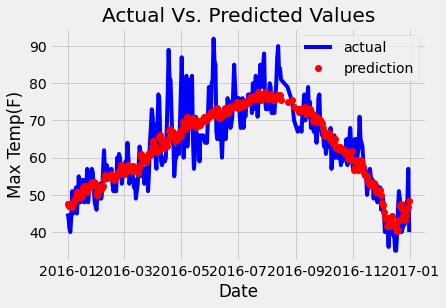

In [32]:
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label='prediction')
plt.legend()

plt.xlabel('Date'); plt.ylabel('Max Temp(F)');plt.title('Actual Vs. Predicted Values')